# Piloting 01: Exclusion Criteria

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
%matplotlib inline

## Exclusion Criterion 1: Accuracy

Reject participants based on poor performance (<50% accuracy) in congruent conditions.

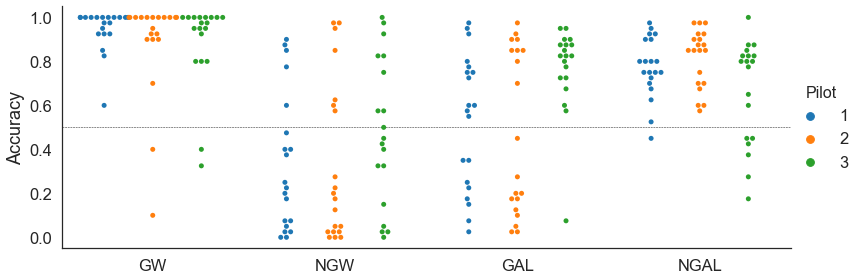

In [2]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Load and prepare data.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Load data and restrict to version 1.
data = read_csv(os.path.join('data','data.csv'))

## Compute accuracy by subject/robot.
gb = data.groupby(['Version','Subject','Robot']).Accuracy.mean().reset_index()
pivot = data.pivot_table('Accuracy',('Subject','Version'),'Robot').reset_index()

## Copy pivot table. Reject participants with less than 50% accuracy in GW.
reject = pivot.copy().reset_index()[['Subject','Version','GW']]
reject[['GW']] = reject[['GW']] < 0.50

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plotting.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))
palette = sns.color_palette(n_colors=4)

## Plot accuracy.
sns.swarmplot('Robot', 'Accuracy', 'Version', data=gb, order=['GW','NGW','GAL','NGAL'], dodge=True)
ax.axhline(0.50, color='0.1', lw=0.5, linestyle='--')
legend = ax.legend(loc=7, bbox_to_anchor=(1.1,0.5), frameon=False, title='Pilot')
plt.setp(legend.get_title(),fontsize=16)
ax.set(xlabel='', ylim=(-0.05,1.05))

sns.despine()
plt.tight_layout()

## Exclusion Criterion 2: Comprehension Check

Remove participants with excessive (+5) comprehension check errors.

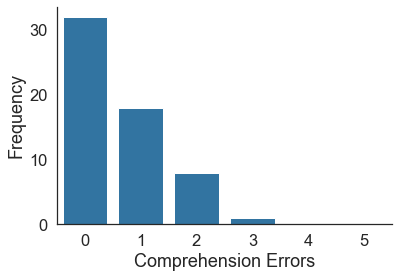

In [3]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Load and prepare data.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Load metadata.
metadata = read_csv(os.path.join('data','metadata.csv'))

## Merge with rejection DataFrame. Reject.
reject = reject.merge(metadata[['Subject','Comp-Errors']])
reject['Comp-Errors'] = reject['Comp-Errors'] >= 5

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plotting.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(6,4))

## Plot comprehension errors.
ax = sns.countplot('Comp-Errors', data=metadata, order=np.arange(6), color='#1f77b4', ax=ax)
ax.set(xlabel='Comprehension Errors', ylabel='Frequency')
sns.despine()

## Exclusion Criterion 3: Instructions Clarity


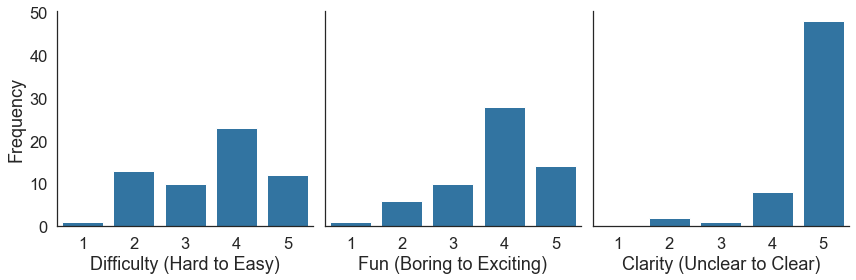

In [4]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Load and prepare data.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Load metadata.
metadata = read_csv(os.path.join('data','metadata.csv'))

## Merge with rejection DataFrame. Reject.
reject = reject.merge(metadata[['Subject','clarity']])
reject['clarity'] = reject['clarity'] == 1

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plotting.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig, axes = plt.subplots(1,3,figsize=(12,4),sharex=True,sharey=True)

## Plot task difficulty.
sns.countplot('difficulty', data=metadata, order=[1,2,3,4,5], color='#1f77b4', ax=axes[0])
axes[0].set(xlabel='Difficulty (Hard to Easy)', ylabel='Frequency')

## Plot task engagement.
sns.countplot('fun', data=metadata, order=[1,2,3,4,5], color='#1f77b4', ax=axes[1])
axes[1].set(xlabel='Fun (Boring to Exciting)', ylabel='')

## Plot instructions clarity.
sns.countplot('clarity', data=metadata, order=[1,2,3,4,5], color='#1f77b4', ax=axes[2])
axes[2].set(xlabel='Clarity (Unclear to Clear)', ylabel='')

sns.despine()
plt.tight_layout()

## Save Rejection DataFrame

In [5]:
## Compute summary value.
reject['Reject'] = reject[reject.columns[2:]].any(axis=1)

## Save.
reject.to_csv(os.path.join('data','reject.csv'), index=False)